## Telco Churn Analysis

#### Dataset Info: Sample Data Set containing Telco customer data and showing customers left last month

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
df.shape

(7043, 21)

#### Data cleaning

#### Checking null values

In [81]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Checking Duplicates

In [82]:
df.duplicated().sum()

0

In [83]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [84]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [85]:
df.loc[df['TotalCharges'].isnull()==True].shape

(11, 21)

In [86]:
df.dropna(inplace=True)

In [87]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [88]:
df.shape

(7032, 21)

In [89]:
df['tenure'].max()

72

In [90]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [91]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

#### Remove columns not required for processing

In [92]:
df.drop(['customerID','tenure'],axis=1,inplace=True)

In [93]:
df.shape

(7032, 20)

#### Separate numerical and Categorical Featurs

In [94]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'tenure_group'], dtype='object')
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


### EDA

#### Univariate Analysis

#### Countplot for Categorical Features

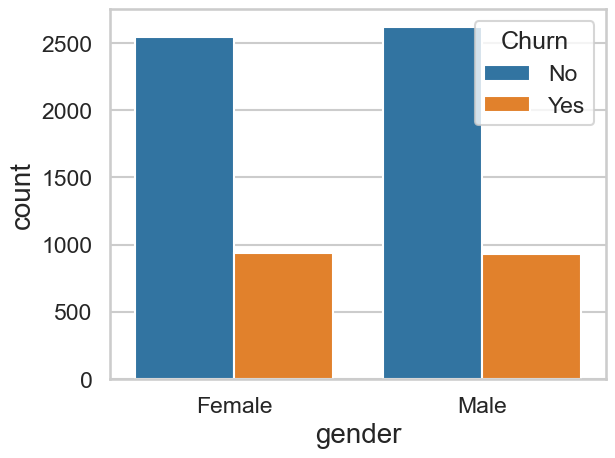

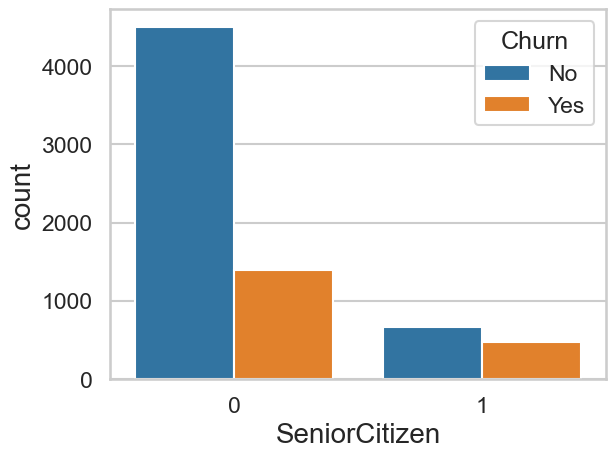

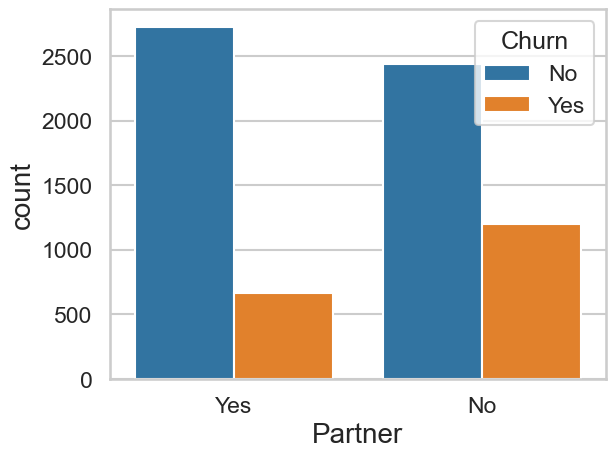

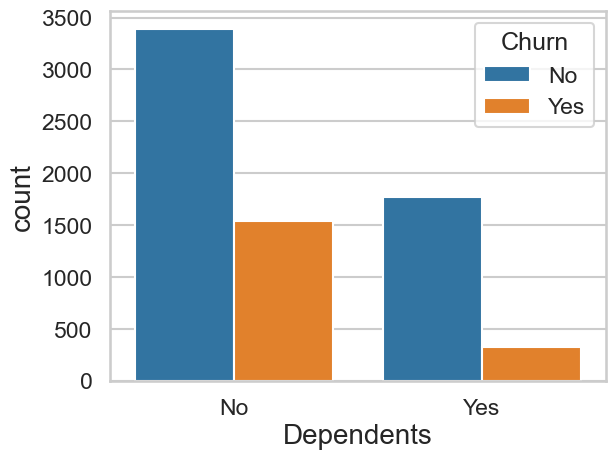

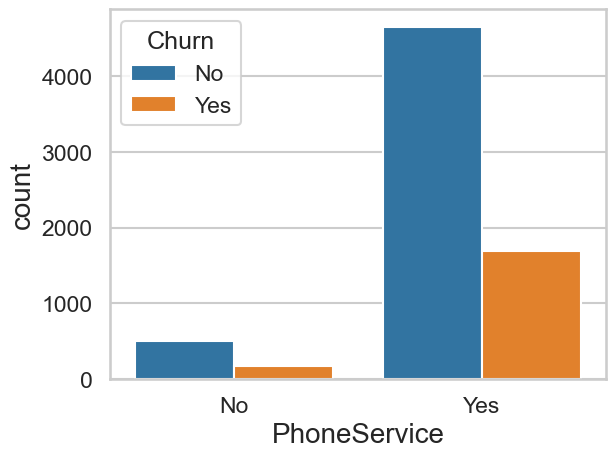

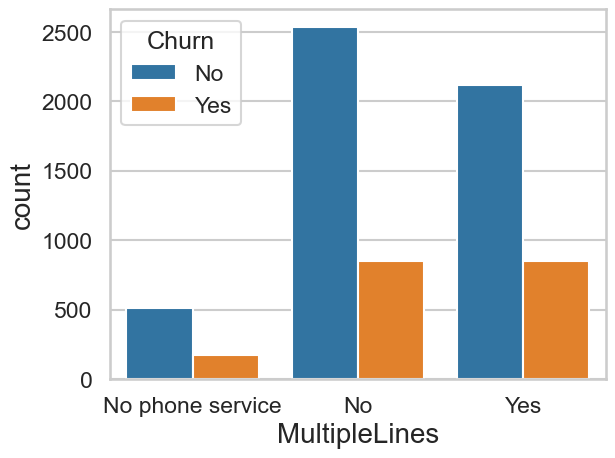

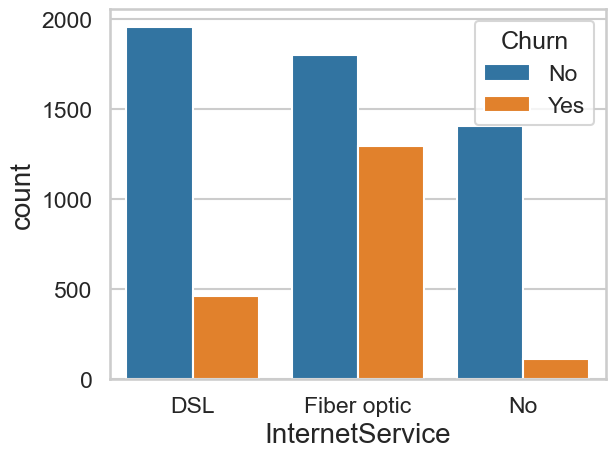

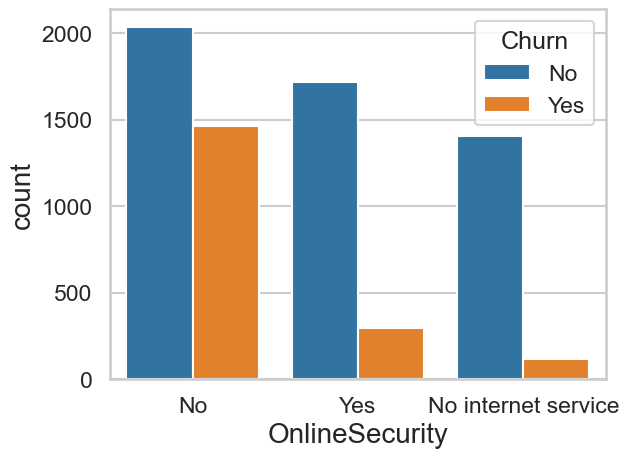

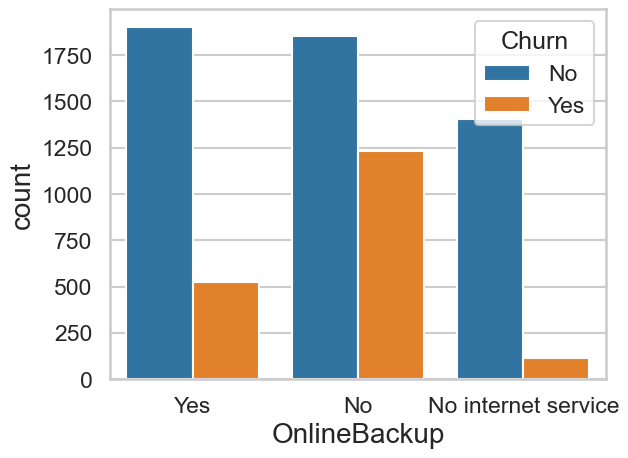

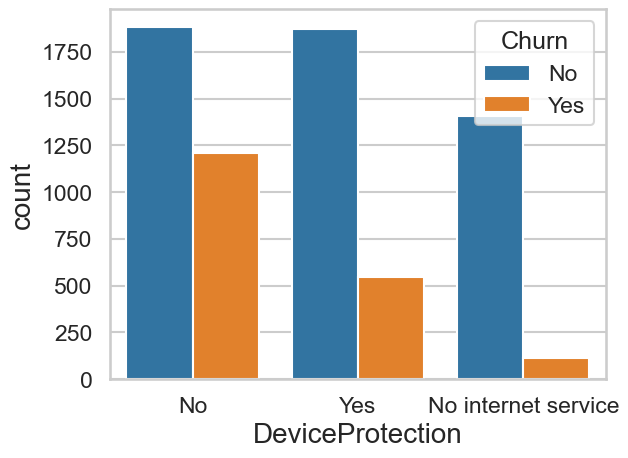

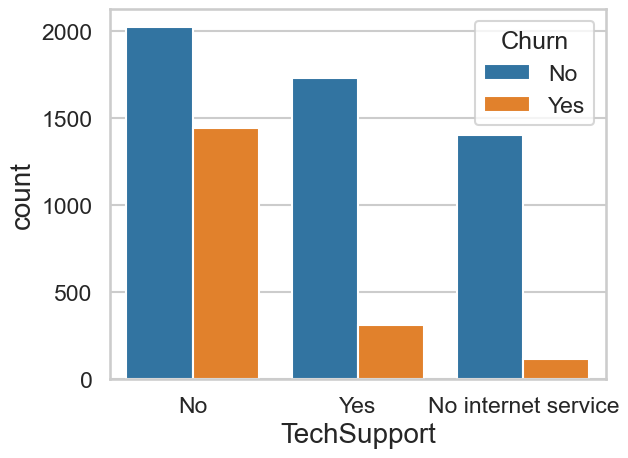

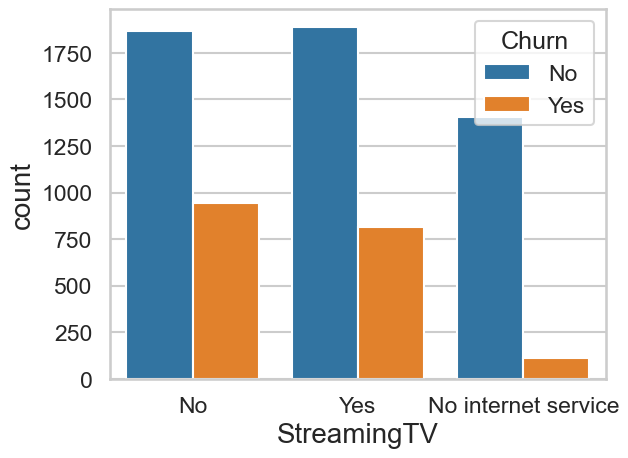

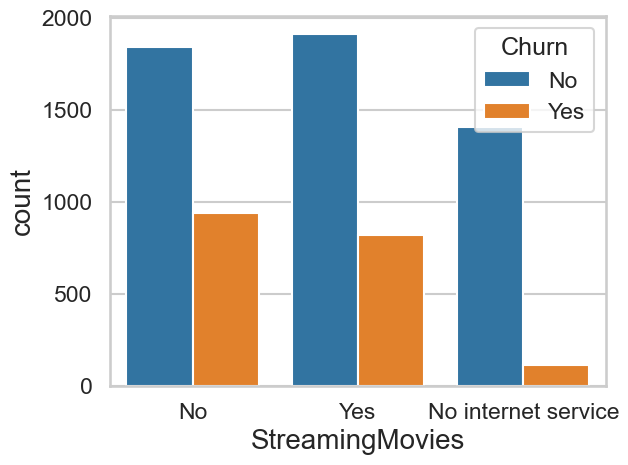

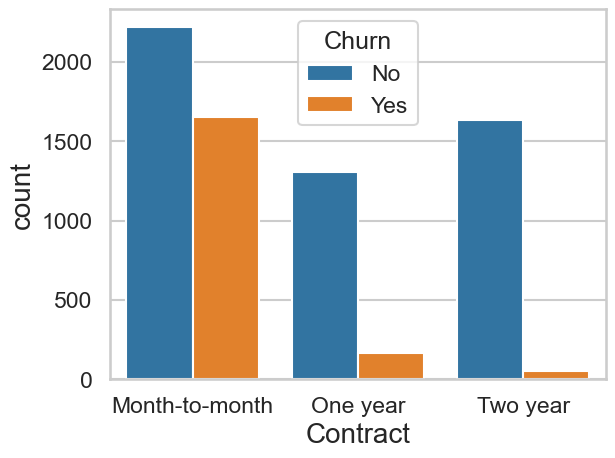

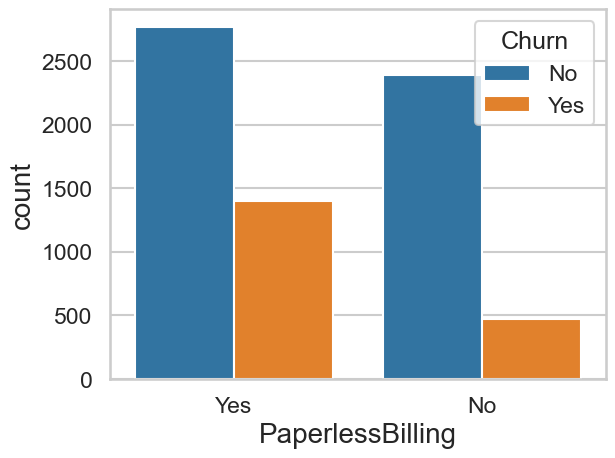

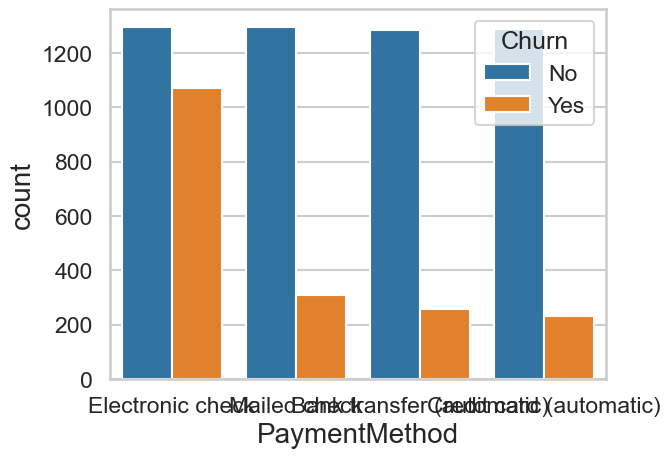

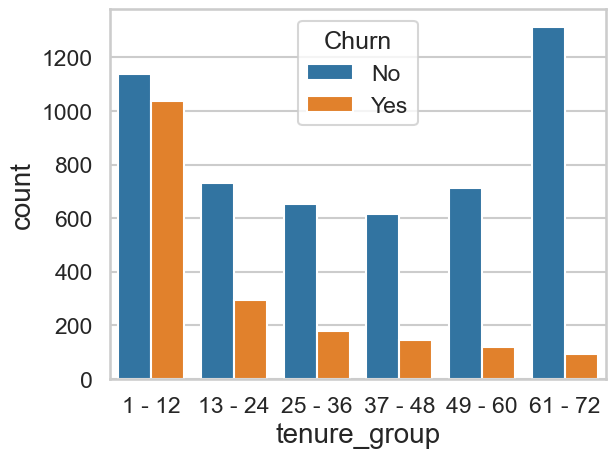

In [95]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

#### Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [96]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [97]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


#### Convert all the categorical variables into dummy variables

In [98]:
df_dum = pd.get_dummies(df)
df_dum.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [99]:
# Relationship btw Monthly charges and Total charges

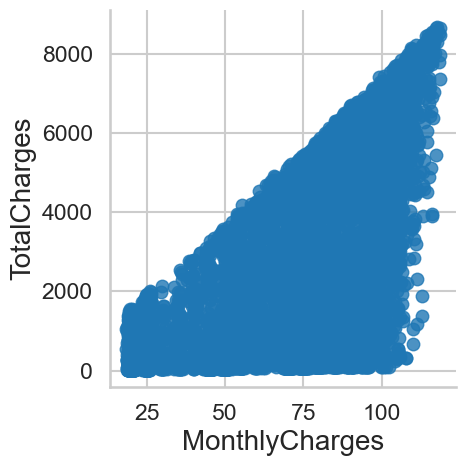

In [100]:
sns.lmplot(data=df,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

In [101]:
#  INSIGHT: total charges increase as monthly charges increase

In [102]:
# churn by monthly charges and total charges

Text(0.5, 1.0, 'Monthly charges by churn')

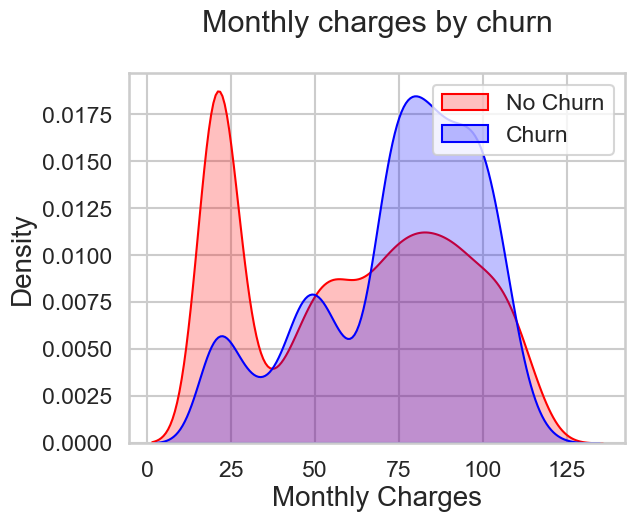

In [103]:
Mth = sns.kdeplot(df_dum.MonthlyCharges[(df_dum["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_dum.MonthlyCharges[(df_dum["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

In [104]:
# INSIGHT: Churn is high when monthly charges are high

Text(0.5, 1.0, 'Total charges by churn')

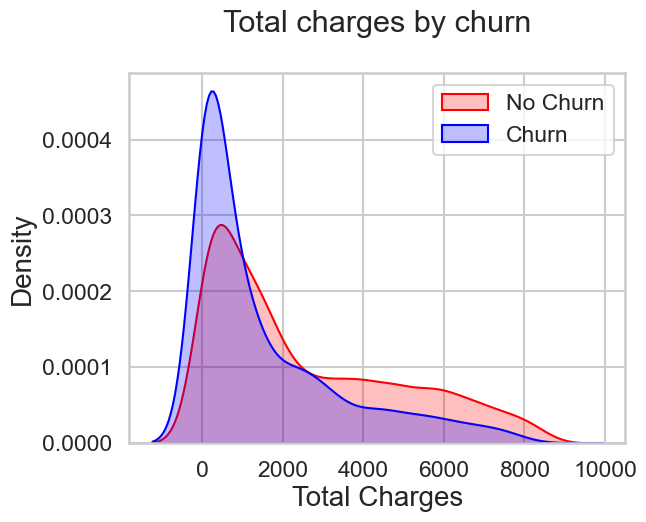

In [105]:
Tot = sns.kdeplot(df_dum.TotalCharges[(df_dum["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df_dum.TotalCharges[(df_dum["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

In [106]:
# INSIGHT: As higher churn at lower charges

#### Bivariate Analysis

In [107]:
new_df0=df.loc[df["Churn"]==0]
new_df1=df.loc[df["Churn"]==1]

In [108]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

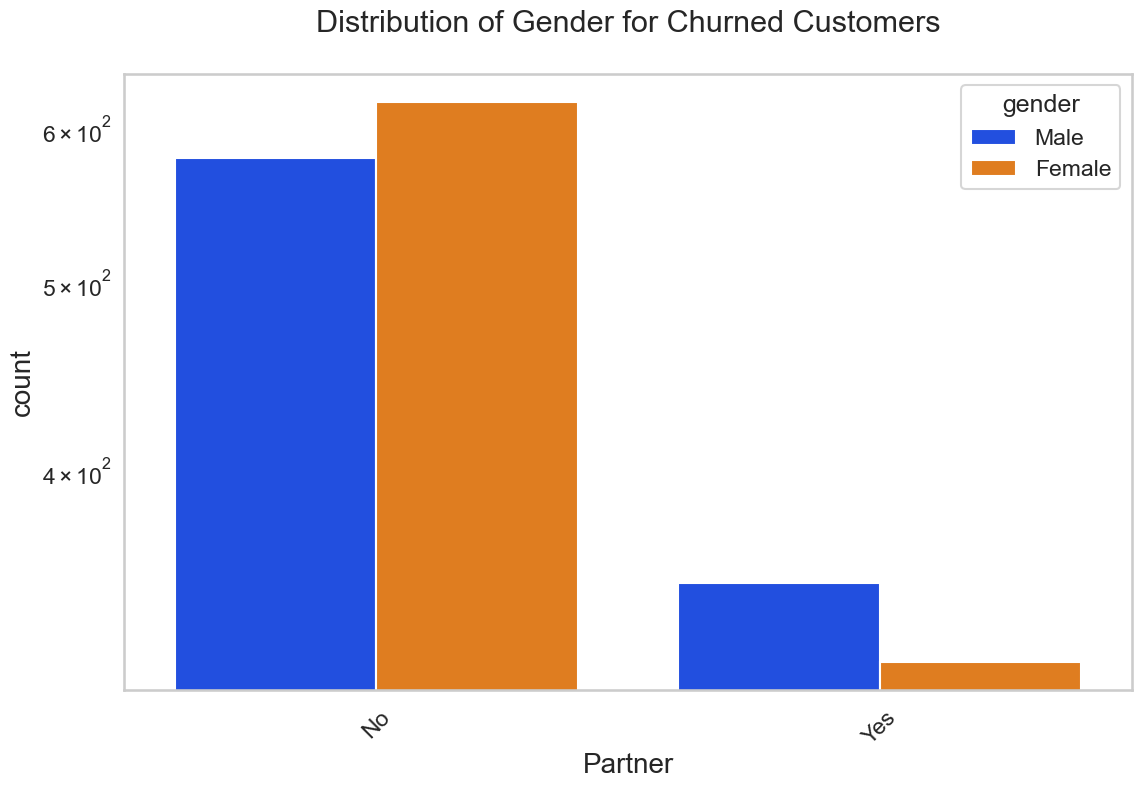

In [109]:
uniplot(new_df1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

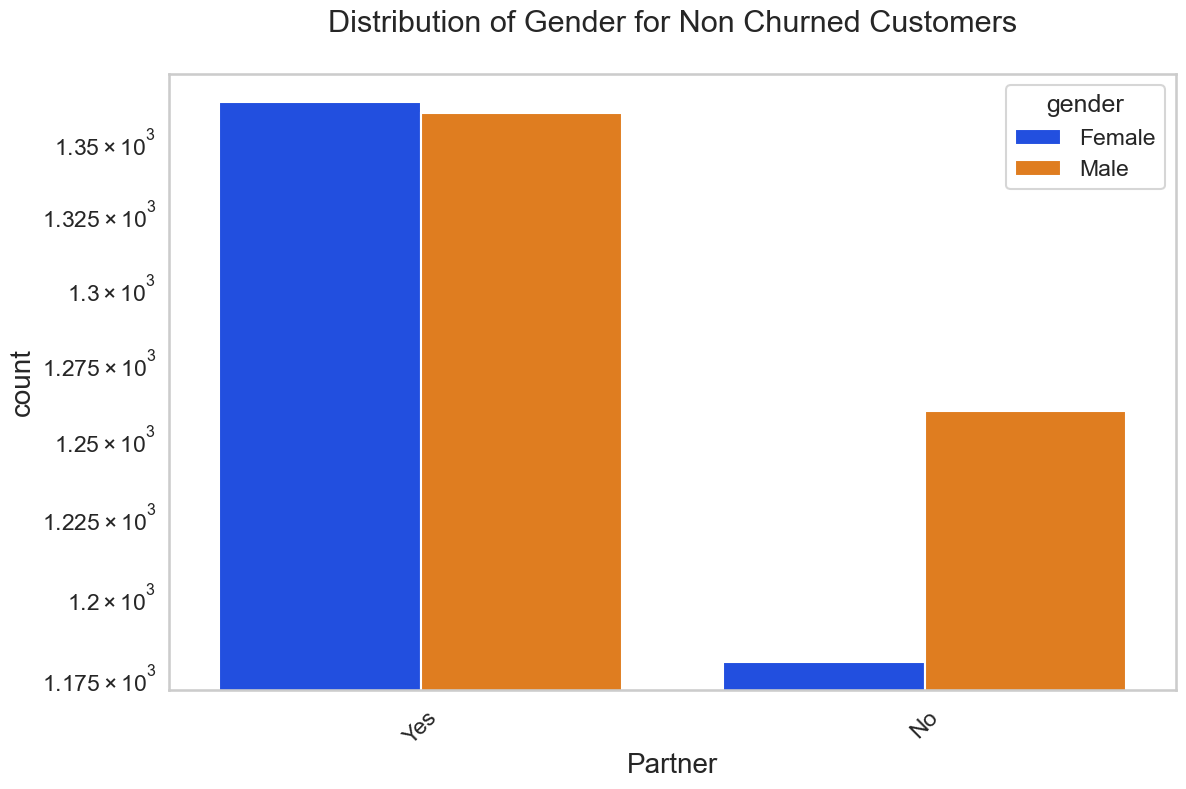

In [110]:
uniplot(new_df0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

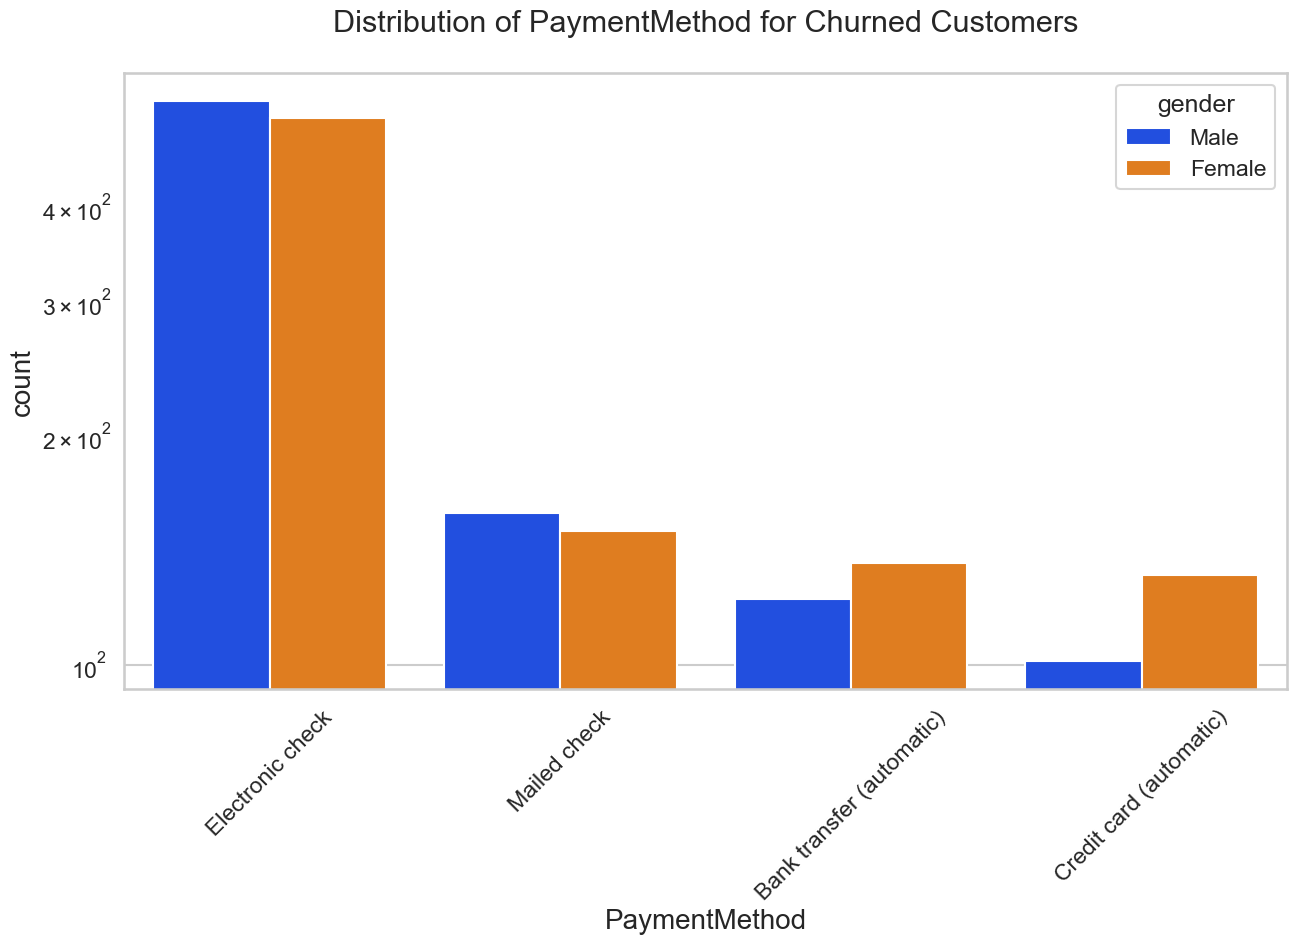

In [111]:
uniplot(new_df1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

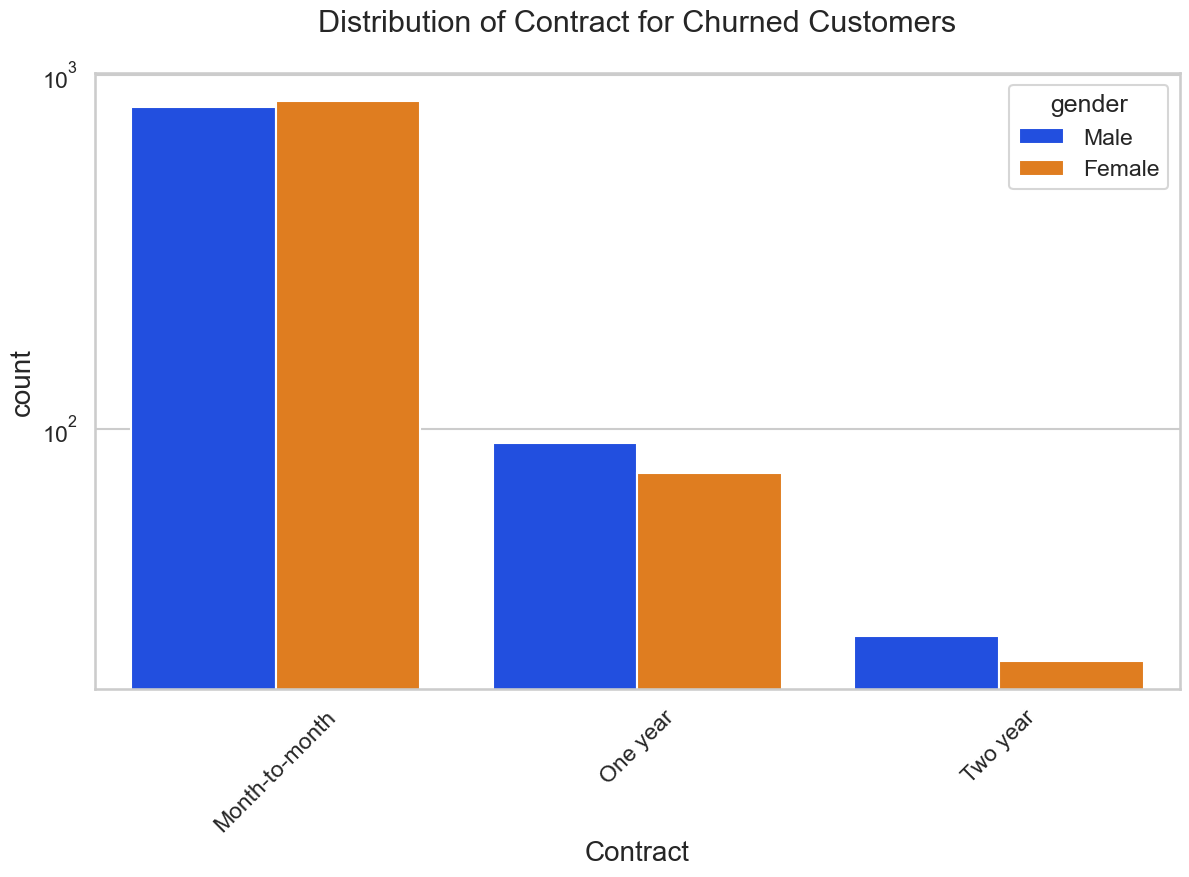

In [112]:
uniplot(new_df1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

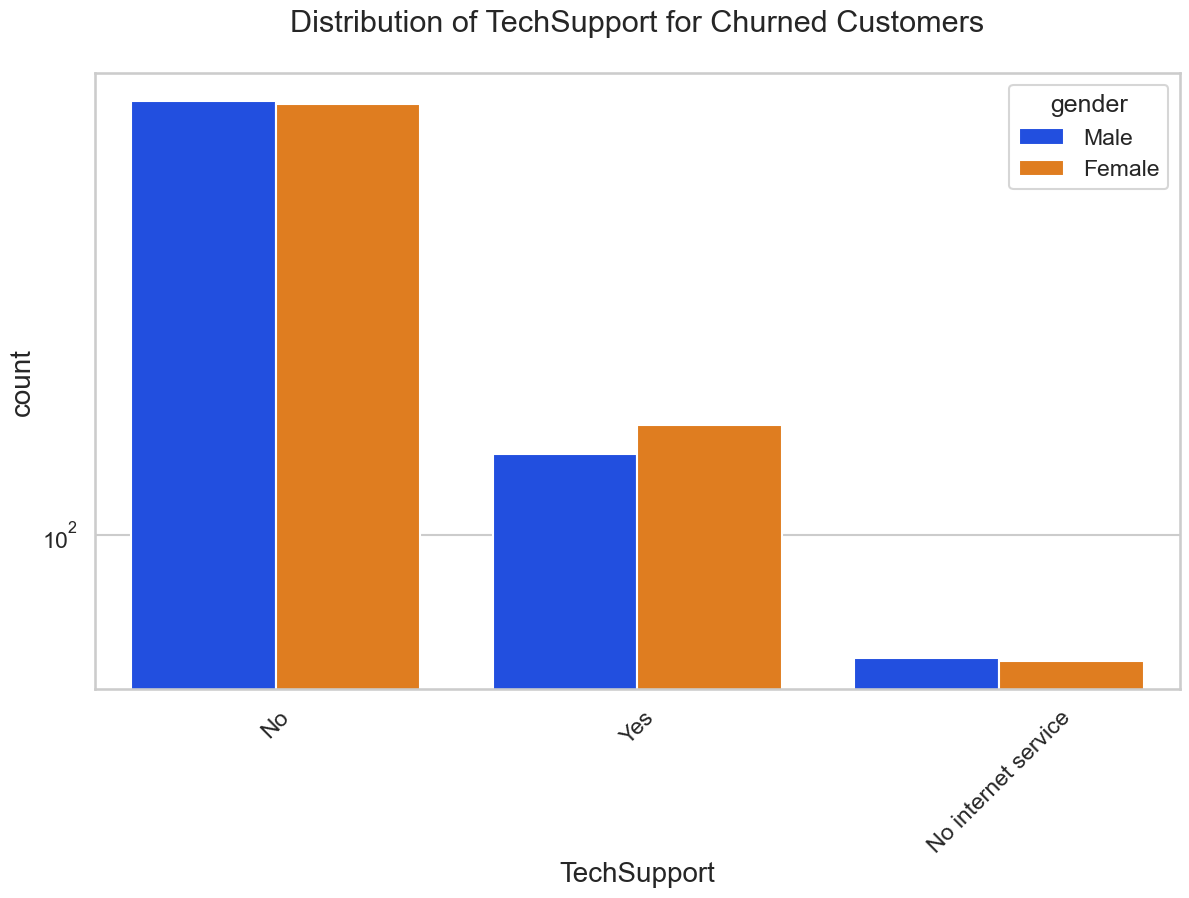

In [113]:
uniplot(new_df1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

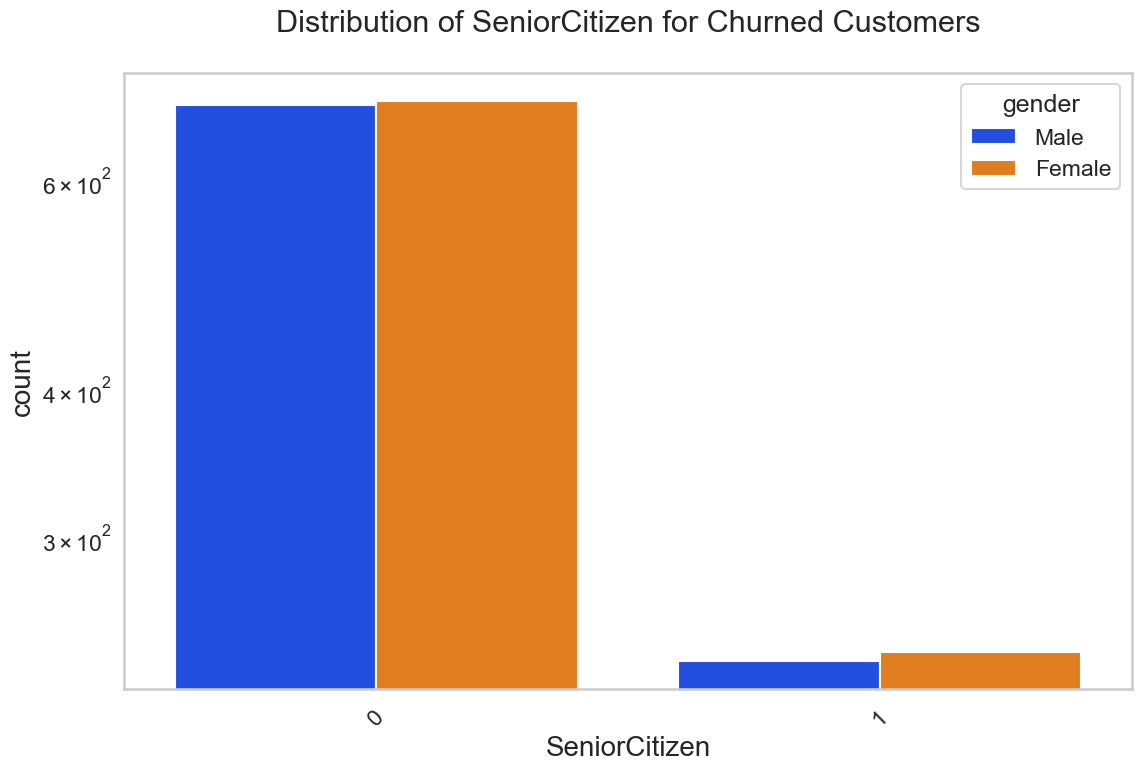

In [114]:
uniplot(new_df1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

CONCLUSION<br>
These are some of the quick insights from this exercise:

Electronic check medium are the highest churners<br>
Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.<br>
No Online security, No Tech Support category are high churners<br>
Non senior Citizens are high churners<br>

Note: There could be many more such insights, so take this as an assignment and try to get more insights :)

### Model Building

In [115]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [116]:
df_dum.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [117]:
x=df_dum.drop('Churn',axis=1)
y=df_dum['Churn']
print(x.shape)
print(y.shape)

(7032, 50)
(7032,)


In [118]:
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


#### Train Test Split

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Decision Tree Classifier

In [120]:
dt = DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [121]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [122]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [123]:
dt.score(x_test,y_test)

0.8009950248756219

In [125]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1032
           1       0.66      0.51      0.58       375

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.<br>

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.<br>

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [130]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()

x_resampled, y_resampled = sm.fit_resample(x, y)



In [131]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled, y_resampled,test_size=0.2)

In [133]:
dt_sm=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [135]:
dt_sm.fit(xr_train,yr_train)
yr_predict = dt_sm.predict(xr_test)
score_r = dt_sm.score(xr_test, yr_test)
print(score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9344827586206896
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       526
           1       0.93      0.95      0.94       634

    accuracy                           0.93      1160
   macro avg       0.93      0.93      0.93      1160
weighted avg       0.93      0.93      0.93      1160



In [136]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[484  42]
 [ 34 600]]


Now we can see quite better results, i.e. Accuracy: 93 %, and a very good recall, precision & f1 score for minority class.
Let's try with some other classifier.

#### Random Forest Classifier

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [140]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [141]:
y_pred = rf.predict(x_test)

In [144]:
rf.score(x_test,y_test)

0.7896233120113717

In [145]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1032
           1       0.65      0.46      0.54       375

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [153]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x, y)


In [154]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [155]:
rf_sm=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [156]:
rf_sm.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [157]:
yr_predict1 = rf_sm.predict(xr_test1)

In [158]:
score_r1 = rf_sm.score(xr_test1, yr_test1)

In [159]:
print(score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9369217830109335
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       536
           1       0.92      0.97      0.94       653

    accuracy                           0.94      1189
   macro avg       0.94      0.93      0.94      1189
weighted avg       0.94      0.94      0.94      1189



In [160]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[479  57]
 [ 18 635]]


With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

#### Performing PCA

In [161]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
x_train_pca = pca.fit_transform(xr_train1)
x_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [162]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [164]:
model.fit(x_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [165]:
yr_predict_pca = model.predict(x_test_pca)

In [166]:
model_score_r_pca = model.score(x_test_pca, yr_test1)

In [167]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7174095878889823
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       536
           1       0.71      0.81      0.76       653

    accuracy                           0.72      1189
   macro avg       0.72      0.71      0.71      1189
weighted avg       0.72      0.72      0.71      1189



With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage.

#### Pickling the model

In [168]:
import pickle

In [169]:
filename = 'rf.sav'

In [170]:
pickle.dump(rf_sm, open(filename, 'wb'))

In [171]:
load_model = pickle.load(open(filename, 'rb'))